In [ ]:
'''
# It contains the analysis, training and prediction of a variety of traditional machine learning methods on clinical data sets of Alzheimer's disease,
# and output prediction results, confusion matrix, accuracy, etc 

# Author: Bo Yin[MC36455*] & Zihan Xue[MC36588*]
# Contact: mc36455@um.edu.mo For Mr.Bo Yin
#          mc36588@um.edu.mo For Ms.Zihan Xue
'''

Group --> Class  
M/F  --> Sex  
Age --> Age  
EDUC --> Years of Education  
SES --> Socioeconomic Status / 1-5  
MMSE --> Mini Mental State Examination  
CDR --> Clinical Dementia Rating  
eTIV --> Estimated total intracranial volume  
nWBV --> Normalize Whole Brain Volume  
ASF --> Atlas Scaling Factor  

In [37]:
import warnings
warnings.simplefilter(action='ignore')


In [38]:
# necessary imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import shapiro
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline


In [39]:
# loading data

df= pd.read_csv('/Users/xuezihan/UM/Courses/AI in Medicine/final/alzheimer.csv')
df.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [41]:
# Data preprocessing
df['MMSE'] = df['MMSE'].fillna(0)
df['SES'] = df['SES'].fillna(0)
# df['Group'] = df['Group'].replace('Converted', 'Mid-Demented')
df['Group'] = df['Group'].replace('Converted', 'Demented')
df.rename(columns={'M/F': 'Sex'}, inplace=True)
df.head()

,Group,Sex,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,0.0,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,0.0,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,0.0,22.0,0.5,1698,0.701,1.034


In [42]:
df.shape

(373, 10)

In [43]:
df.describe()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,77.013405,14.597855,2.335121,27.195710,0.290885,1488.128686,0.729568,1.195461
std,7.640957,2.876339,1.230340,4.182244,0.374557,176.139286,0.037135,0.138092
min,60.000000,6.000000,0.000000,0.000000,0.000000,1106.000000,0.644000,0.876000
25%,71.000000,12.000000,1.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    object 
 1   Sex     373 non-null    object 
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     373 non-null    float64
 5   MMSE    373 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 29.3+ KB


In [44]:
# Extracting categorical and numerical columns  
cat_cols = df[['Group','Sex']]
num_cols = df[[ 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']]


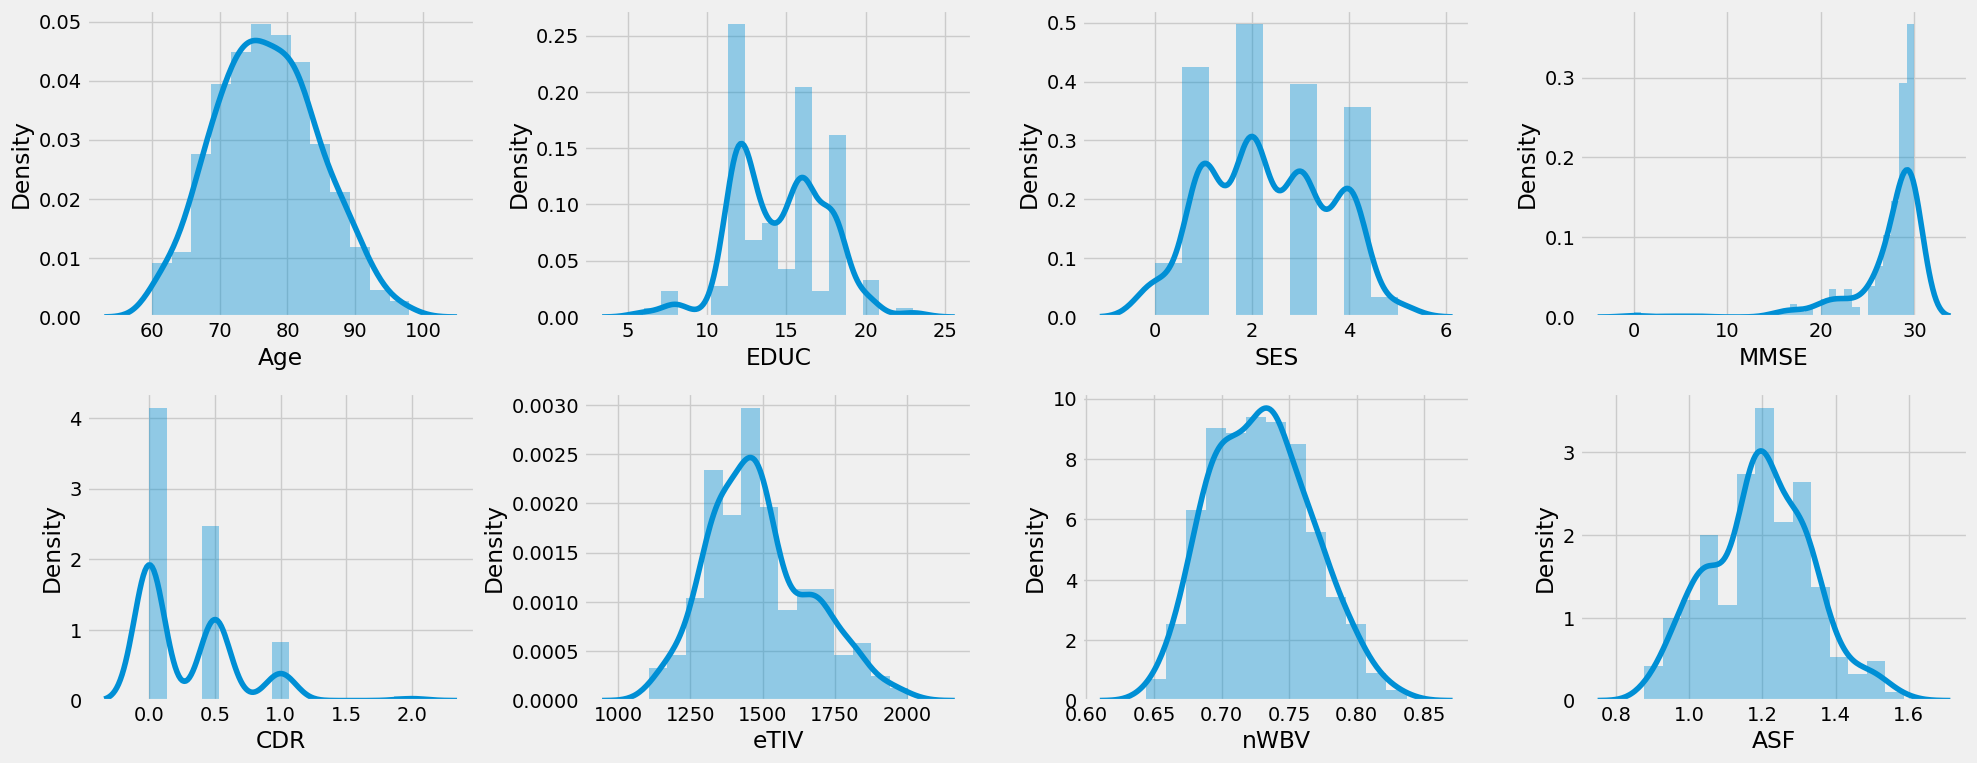

In [24]:
# data visualization

plotnumber = 1
plt.figure(figsize = (20, 15))
for column in num_cols:
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

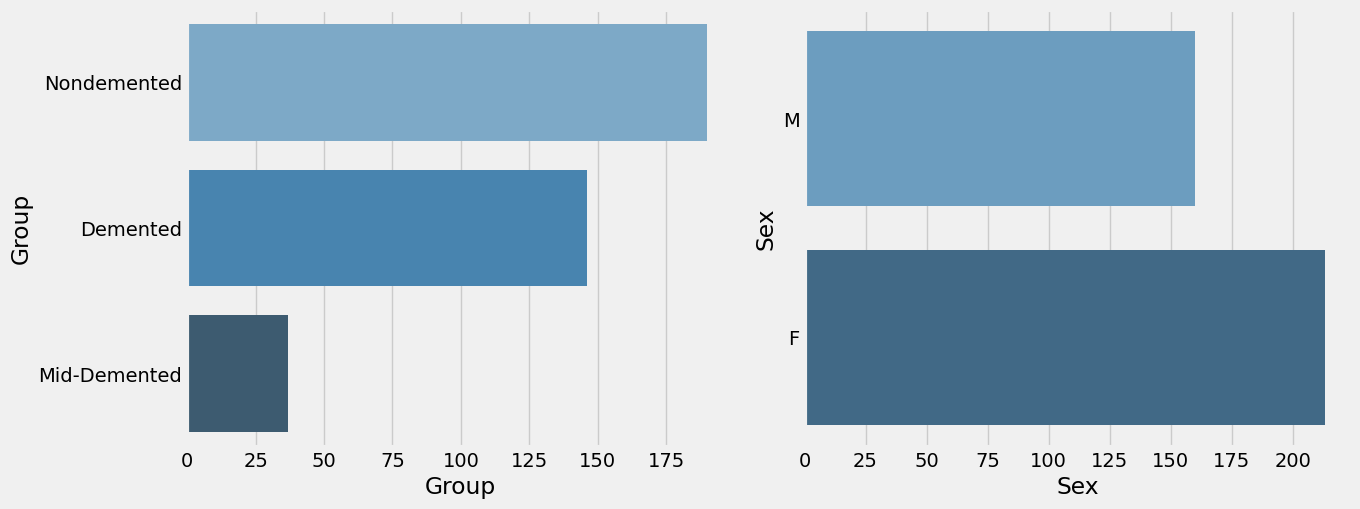

In [25]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.countplot(df[column], palette='Blues_d')  # 使用了深蓝色色系
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()


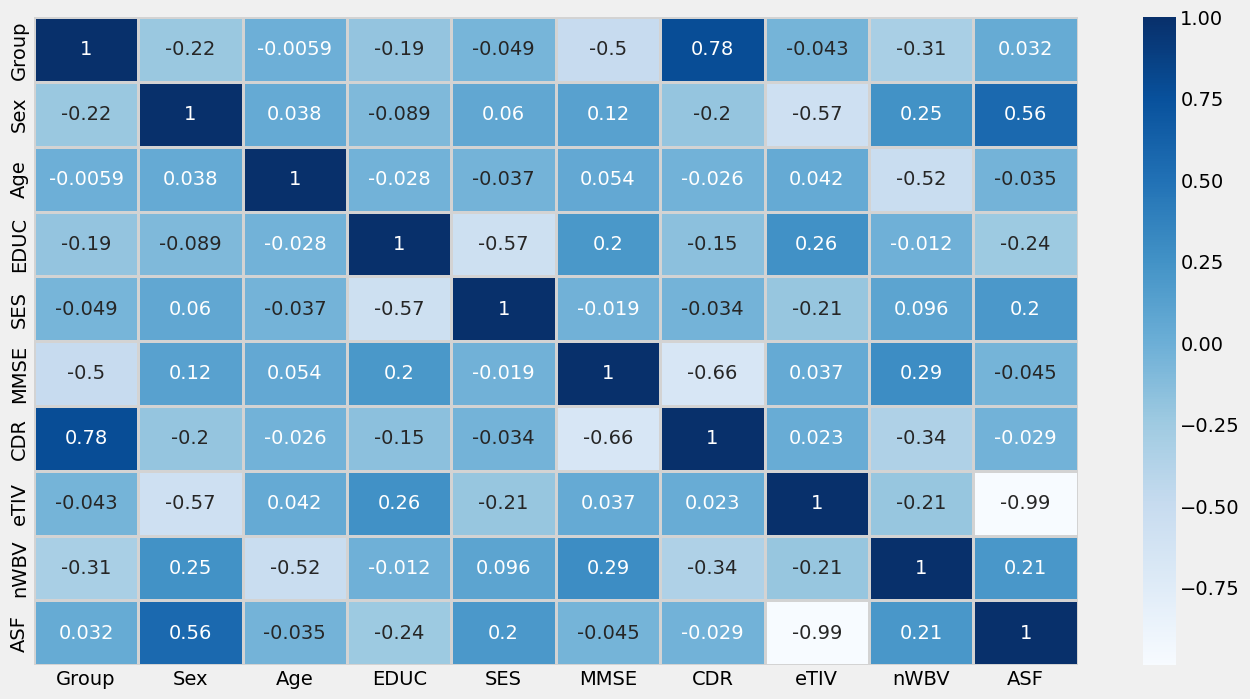

In [11]:
# heatmap of data
df['Sex'] = df['Sex'].replace({'M': 0, 'F': 1})
df['Group'] = df['Group'].replace({'Nondemented': 0, 'Mid-Demented': 1, 'Demented':2})
plt.figure(figsize = (15, 8))

sns.heatmap(df.corr(), cmap="Blues",annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

# Exploratory Data Analysis (EDA)

In [26]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df["MMSE"], df["eTIV"], df["nWBV"], c="blue", s=20, alpha=0.5)
plt.show()

<Figure size 640x480 with 0 Axes>

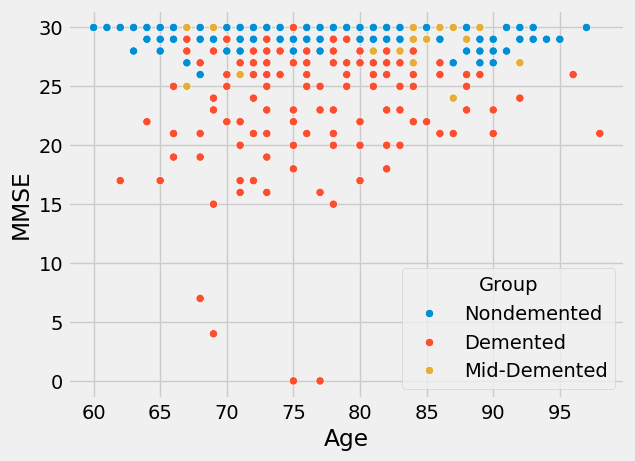

In [27]:
sns.scatterplot(x="Age",y="MMSE",hue="Group",data=df)
plt.show()

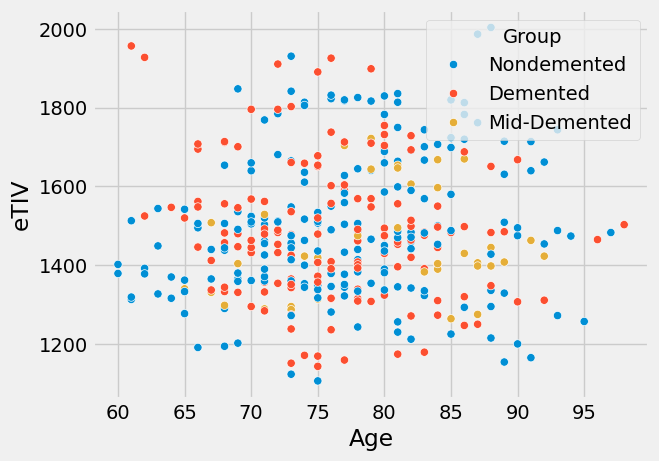

In [28]:
sns.scatterplot(x="Age",y="eTIV",hue="Group",data=df)
plt.show()

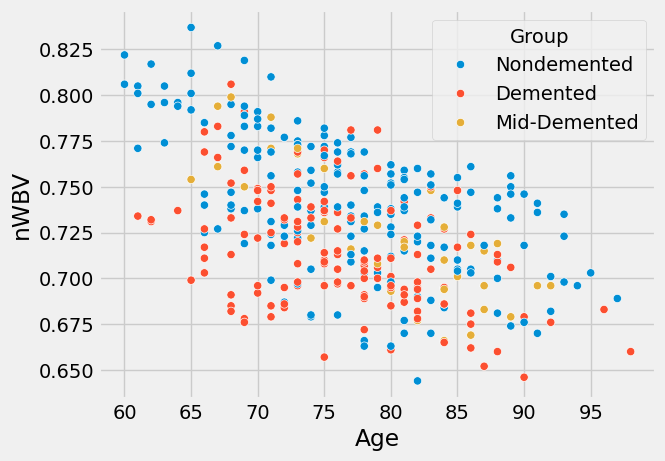

In [29]:
sns.scatterplot(x="Age",y="nWBV",hue="Group",data=df)
plt.show()

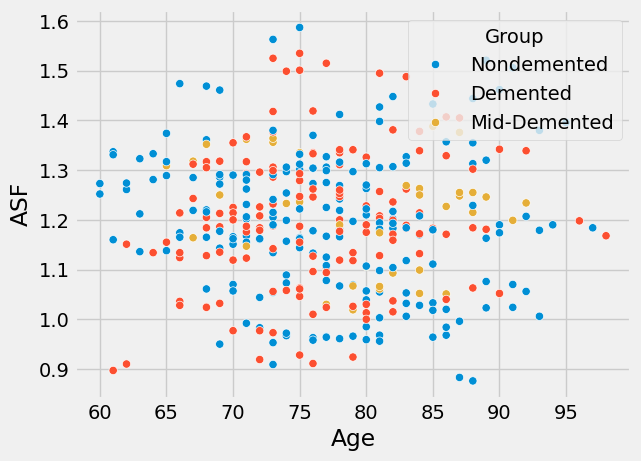

In [30]:
sns.scatterplot(x="Age",y="ASF",hue="Group",data=df)
plt.show()

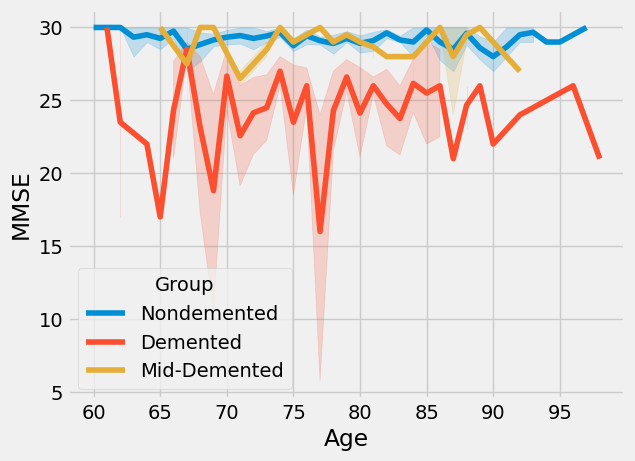

In [31]:
sns.lineplot(x="Age", y="MMSE",hue="Group", data=df)
plt.show()

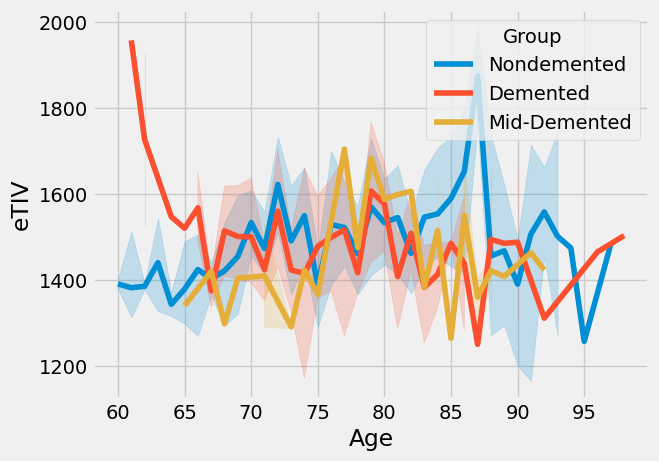

In [32]:
sns.lineplot(x="Age", y="eTIV",hue="Group", data=df)
plt.show()


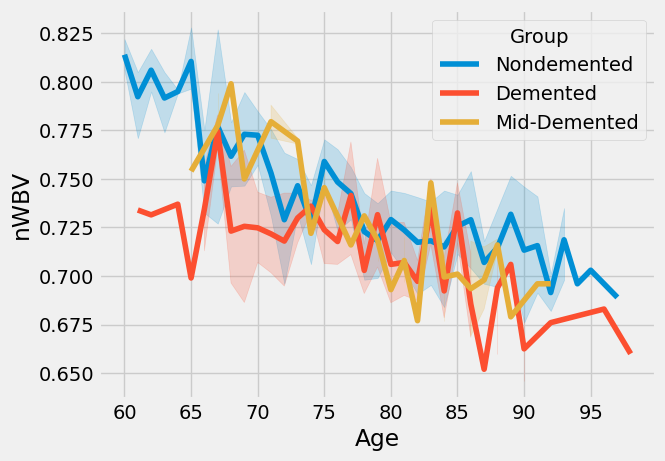

In [33]:
sns.lineplot(x="Age", y="nWBV",hue="Group", data=df)
plt.show()

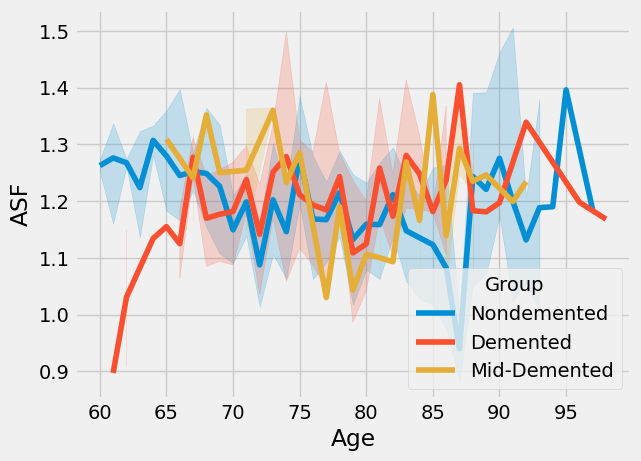

In [34]:
sns.lineplot(x="Age", y="ASF",hue="Group", data=df)
plt.show()

# Correlation Visualization

In [32]:
# difine methods
Features = ["MMSE","eTIV","nWBV","ASF"]
corrPearson = df[Features].corr(method="pearson")
corrSpearman = df[Features].corr(method="spearman")


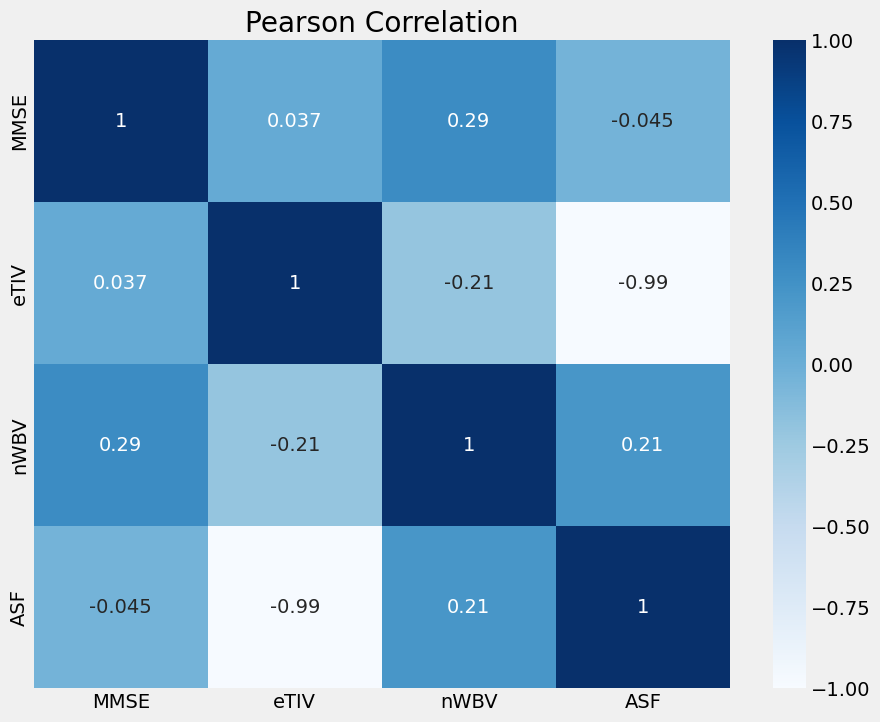

In [16]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(corrPearson,annot=True,cmap='Blues', vmin=-1, vmax=+1)

plt.title("Pearson Correlation")
plt.show()

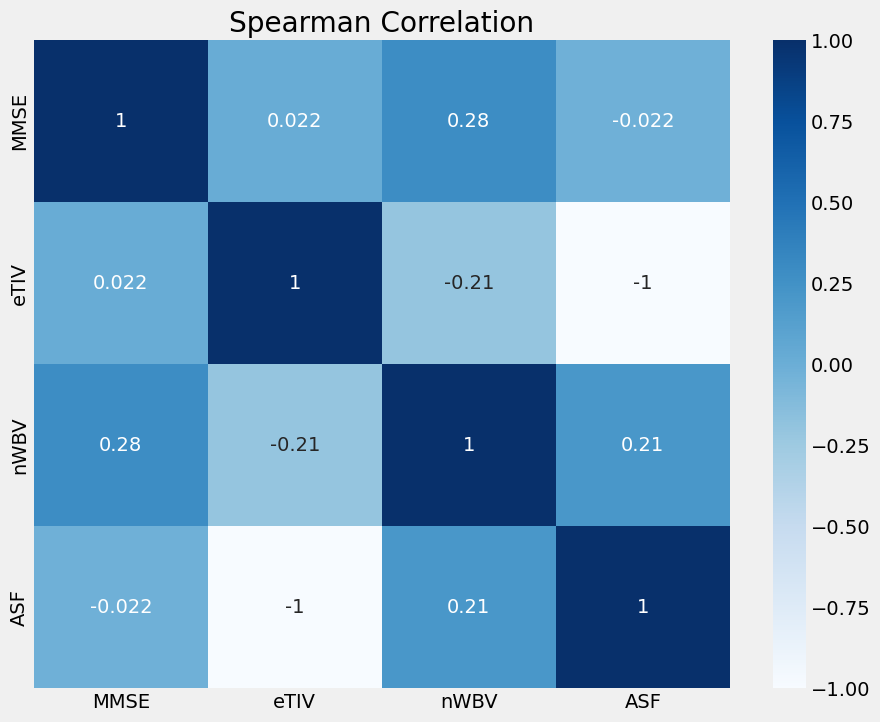

In [17]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(corrSpearman,annot=True,cmap='Blues', vmin=-1, vmax=+1)

plt.title("Spearman Correlation")
plt.show()

In [33]:
for i in Features:
    print(i,"-----------")
    print(shapiro(df[i]))

MMSE -----------
ShapiroResult(statistic=0.6637152433395386, pvalue=1.639195183150931e-26)
eTIV -----------
ShapiroResult(statistic=0.9752794504165649, pvalue=5.4103061302157585e-06)
nWBV -----------
ShapiroResult(statistic=0.991225004196167, pvalue=0.025970669463276863)
ASF -----------
ShapiroResult(statistic=0.9913421273231506, pvalue=0.02795340307056904)


# Feature Encoding
Demented (0)
Nondemented (1)


In [45]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

Group has 2 categories

Sex has 2 categories



In [46]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])
df.head()

,Group,Sex,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,0,1,75,12,0.0,23.0,0.5,1678,0.736,1.046
3,0,1,76,12,0.0,28.0,0.5,1738,0.713,1.010
4,0,1,80,12,0.0,22.0,0.5,1698,0.701,1.034


# X & Y FOR MODELS

In [47]:
x = df.drop("Group",axis=1)
y = df["Group"]

xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=0.20,random_state=42)

# Model Building

LOGISTIC REGRESSION MODEL & ERROR & TUNING & PREDICT

Training Accuracy of Logistic Regression is 0.96
Test Accuracy of Logistic Regression is 0.88 



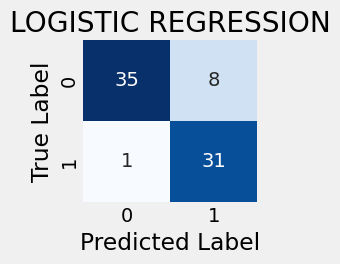

Classification Report :- 
              precision    recall  f1-score   support

           0       0.97      0.81      0.89        43
           1       0.79      0.97      0.87        32

    accuracy                           0.88        75
   macro avg       0.88      0.89      0.88        75
weighted avg       0.90      0.88      0.88        75



In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
# Train the logistic regression classifier
lj = LogisticRegression(solver="liblinear").fit(xTrain, yTrain)

# Make predictions on the training and test sets
train_predict = lj.predict(xTrain)
test_predict = lj.predict(xTest)

# Calculate the accuracy of the training set
train_accuracy = accuracy_score(yTrain, train_predict)
print(f"Training Accuracy of Logistic Regression is {train_accuracy:.2f}")

# Calculate the accuracy of the test set
lgm_acc = accuracy_score(yTest, test_predict)
print(f"Test Accuracy of Logistic Regression is {lgm_acc:.2f} \n")

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(yTest, test_predict)

# Draw an image of the confusion matrix
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("LOGISTIC REGRESSION")
plt.show()

# Calculate and print classification reports
class_report = classification_report(yTest, test_predict)
print(f"Classification Report :- \n{class_report}")


KNN models & error & prediction

Training Accuracy of KNN is 0.7684563758389261
Test Accuracy of KNN is 0.68 



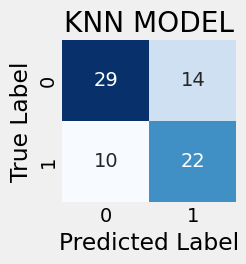

Classification Report :- 
               precision    recall  f1-score   support

           0       0.74      0.67      0.71        43
           1       0.61      0.69      0.65        32

    accuracy                           0.68        75
   macro avg       0.68      0.68      0.68        75
weighted avg       0.69      0.68      0.68        75



In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(xTrain, yTrain)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(yTest, knn.predict(xTest))

print(f"Training Accuracy of KNN is {accuracy_score(yTrain, knn.predict(xTrain))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

cm = confusion_matrix(yTest, knn.predict(xTest))

# Draw an image of the confusion matrix
plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("KNN MODEL")
plt.show()
print(f"Classification Report :- \n {classification_report(yTest, knn.predict(xTest))}")

Decision Tree Classifier

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.9066666666666666 



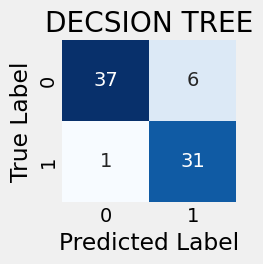

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      0.86      0.91        43
           1       0.84      0.97      0.90        32

    accuracy                           0.91        75
   macro avg       0.91      0.91      0.91        75
weighted avg       0.92      0.91      0.91        75



In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(xTrain, yTrain)

# calculate the accuracy
dtc_acc = accuracy_score(yTest, dtc.predict(xTest))

# Output training and test accuracy
print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(yTrain, dtc.predict(xTrain))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

# Generate data for the confusion matrix
cm = confusion_matrix(yTest, dtc.predict(xTest))

# Draw an image of the confusion matrix
plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("DECSION TREE")
plt.show()

# Output classification report
print(f"Classification Report :- \n {classification_report(yTest, dtc.predict(xTest))}")
dtc = DecisionTreeClassifier(random_state=42)



In [56]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV to the resampled training data
# Make sure xTrain_res and yTrain_res are defined in your local environment


In [57]:
# Print the best parameters and the best score
grid_search.fit(xTrain, yTrain)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10; total t

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.8666666666666667 



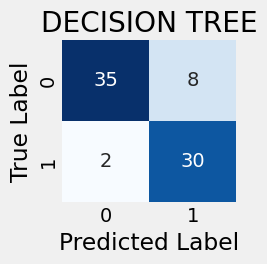

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      0.81      0.88        43
           1       0.79      0.94      0.86        32

    accuracy                           0.87        75
   macro avg       0.87      0.88      0.87        75
weighted avg       0.88      0.87      0.87        75



In [58]:
# best estimator

dtc = grid_search.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(yTest, dtc.predict(xTest))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(yTrain, dtc.predict(xTrain))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

# Generate data for the confusion matrix
cm = confusion_matrix(yTest, dtc.predict(xTest))

# Draw an image of the confusion matrix
plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("DECISION TREE")
plt.show()
print(f"Classification Report :- \n {classification_report(yTest, dtc.predict(xTest))}")

RANDOM FOREST CLASSIFIER

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.1s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.1s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=   0.1s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.1s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=   0.1s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=   0.1s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_

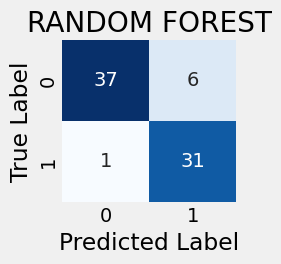

Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.86      0.91        43
           1       0.84      0.97      0.90        32

    accuracy                           0.91        75
   macro avg       0.91      0.91      0.91        75
weighted avg       0.92      0.91      0.91        75



In [59]:

import warnings
warnings.simplefilter(action='ignore')


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns


# Use the SMOTE technique to deal with data imbalances
sm = SMOTE(random_state=42)
xTrain_res, yTrain_res = sm.fit_resample(xTrain, yTrain)

# Initializes the random forest classifier
rd_clf = RandomForestClassifier(random_state=42)

# Set parameter grid
param_grid = {
    'criterion': ['entropy'],
    'max_depth': [10, 11, 12],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [120, 130, 140]
}

# Use grid search to find the best parameters
grid_search = GridSearchCV(estimator=rd_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(xTrain_res, yTrain_res)

# Models with optimal parameters
best_clf = grid_search.best_estimator_

# Train and test the model
best_clf.fit(xTrain_res, yTrain_res)
y_pred = best_clf.predict(xTest)

rfc_acc = accuracy_score(yTest, y_pred)

# Output model performance
print(f"Training Accuracy: {accuracy_score(yTrain_res, best_clf.predict(xTrain_res))}")
print(f"Test Accuracy: {accuracy_score(yTest, y_pred)} \n")

# Generate data for the confusion matrix
cm = confusion_matrix(yTest, y_pred)

# Generate image for the confusion matrix
plt.figure(figsize=(2, 2))  
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("RANDOM FOREST")
plt.show()

print(f"Classification Report: \n{classification_report(yTest, y_pred)}")



 GRADIENT BOOSTING MACHINES (GBM) MODELS

Training Accuracy of Gradient Boosting Classifier is 1.0
Test Accuracy of Gradient Boosting Classifier is 0.8933333333333333 



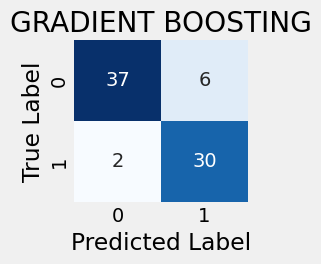

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      0.86      0.90        43
           1       0.83      0.94      0.88        32

    accuracy                           0.89        75
   macro avg       0.89      0.90      0.89        75
weighted avg       0.90      0.89      0.89        75



In [61]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
gbmc = GradientBoostingClassifier().fit(xTrain,yTrain)
predict = gbmc.predict(xTest)

# print(accuracy_score(yTest,predict))
R2CV = cross_val_score(gbmc,xTest,yTest,cv=10).mean()
# print(R2CV)
# 0.82
error = mean_squared_error(yTest,predict)
# print(np.sqrt(error))

params = {"learning_rate": [0.001,0.01,0.1,0.05],
         "max_depth": [3,5,10],
         "n_estimators": [100,300,500,1000],
         "min_samples_split":[2,5,10]}

# cv = GridSearchCV(gbmc,params,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
# print(cv.best_params_)

gbmctuned = GradientBoostingClassifier(learning_rate=0.1, max_depth=3,
                                           min_samples_split=10, n_estimators=1000).fit(xTrain, yTrain)

predicttuned = gbmctuned.predict(xTest)
#print(accuracy_score(yTest,predicttuned))
R2CVtuned = cross_val_score(gbmctuned,xTest,yTest,cv=10).mean()
# print(R2CVtuned)
# 0.81
errortuned = mean_squared_error(yTest,predicttuned)
# print(np.sqrt(errortuned))
gb_acc = accuracy_score(yTest, gbmctuned.predict(xTest))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(yTrain, gbmctuned.predict(xTrain))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

# Generate data for the confusion matrix
cm = confusion_matrix(yTest, gbmctuned.predict(xTest))

# Generate image for the confusion matrix
plt.figure(figsize=(2, 2))  
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("GRADIENT BOOSTING")
plt.show()
print(f"Classification Report :- \n {classification_report(yTest, gbmctuned.predict(xTest))}")

XGBOOST CLASSIFIER MODELS & ERROR & TUNING & PREDICT

Training Accuracy of XgBoost is 0.9630872483221476
Test Accuracy of XgBoost is 0.88 



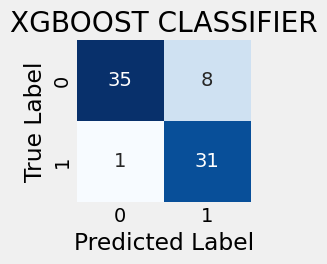

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      0.81      0.89        43
           1       0.79      0.97      0.87        32

    accuracy                           0.88        75
   macro avg       0.88      0.89      0.88        75
weighted avg       0.90      0.88      0.88        75



In [62]:
from xgboost import XGBRegressor, XGBClassifier
xgbc = XGBClassifier(verbose=False).fit(xTrain,yTrain)
predict = xgbc.predict(xTest)

# print(accuracy_score(yTest,predict))
R2CV = cross_val_score(xgbc,xTest,yTest,cv=10).mean()
# print(R2CV)
# 0.84
error = mean_squared_error(yTest,predict)
# print(np.sqrt(error))

params = {"n_estimators": [100, 500, 1000, 2000],
          "subsample": [0.6, 0.8, 1.0],
          "max_depth": [3, 4, 5, 6],
          "learning_rate": [0.1, 0.01, 0.02, 0.05],
          "min_samples_split": [2, 5, 10]}

# cv = GridSearchCV(xgbc,params,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
# print(cv.best_params_)

xgbctuned = XGBClassifier(learning_rate=0.01, max_depth=6, min_samples_split=2,
                              n_estimators=100, subsample=0.8).fit(xTrain, yTrain)

predicttuned = xgbctuned.predict(xTest)
# print(accuracy_score(yTest,predicttuned))
R2CVtuned = cross_val_score(xgbctuned,xTest,yTest,cv=10).mean()
# print(R2CVtuned)
# 0.82
errortuned = mean_squared_error(yTest,predicttuned)
# print(np.sqrt(errortuned))

xgb_acc = accuracy_score(yTest, xgbctuned.predict(xTest))
print(f"Training Accuracy of XgBoost is {accuracy_score(yTrain, xgbctuned.predict(xTrain))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

# Generate data for the confusion matrix
cm = confusion_matrix(yTest, xgbctuned.predict(xTest))

# Generate image for the confusion matrix
plt.figure(figsize=(2, 2))  
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("XGBOOST CLASSIFIER")
plt.show()
print(f"Classification Report :- \n {classification_report(yTest, xgbctuned.predict(xTest))}")

CATBOOST CLASSIFIER MODELS & ERROR & TUNING & PREDICT

Training Accuracy of Cat Boost Classifier is 1.0
Test Accuracy of Cat Boost Classifier is 0.8933333333333333 



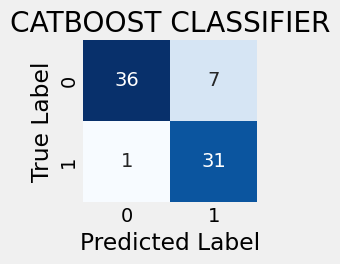

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      0.84      0.90        43
           1       0.82      0.97      0.89        32

    accuracy                           0.89        75
   macro avg       0.89      0.90      0.89        75
weighted avg       0.91      0.89      0.89        75



In [63]:
from catboost import CatBoostClassifier
catbc = CatBoostClassifier(verbose=False).fit(xTrain,yTrain)
predict = catbc.predict(xTest)

# print(accuracy_score(yTest,predict))
R2CV = cross_val_score(catbc,xTest,yTest,cv=10).mean()
# print(R2CV)
# 0.80
error = mean_squared_error(yTest,predict)
# print(np.sqrt(error))

params = {"iterations": [200, 500],
          "learning_rate": [0.01, 0.05, 0.1],
          "depth": [3, 5, 8]}

# cv = GridSearchCV(catbc,params,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
# rint(cv.best_params_)

catbctuned = CatBoostClassifier(depth=5, iterations=200, learning_rate=0.05,verbose=False).fit(xTrain, yTrain)
predicttuned = catbctuned.predict(xTest)
# print(accuracy_score(yTest,predicttuned))
R2CVtuned = cross_val_score(catbctuned,xTest,yTest,cv=10).mean()
# print(R2CVtuned)
# 0.83
errortuned = mean_squared_error(yTest,predicttuned)
# print(np.sqrt(errortuned))
cat_acc = accuracy_score(yTest, catbctuned.predict(xTest))

print(f"Training Accuracy of Cat Boost Classifier is {accuracy_score(yTrain, catbctuned.predict(xTrain))}")
print(f"Test Accuracy of Cat Boost Classifier is {cat_acc} \n")

# Generate data for the confusion matrix
cm = confusion_matrix(yTest, catbctuned.predict(xTest))

# Generate image for the confusion matrix
plt.figure(figsize=(2, 2))  
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("CATBOOST CLASSIFIER")
plt.show()
print(f"Classification Report :- \n {classification_report(yTest, catbctuned.predict(xTest))}")

 CLASSIFIER LIGHTGBM MODELS & ERROR & TUNING & PREDICT

Training Accuracy of LGBM Classifier is 0.9664429530201343
Test Accuracy of LGBM Classifier is 0.88 



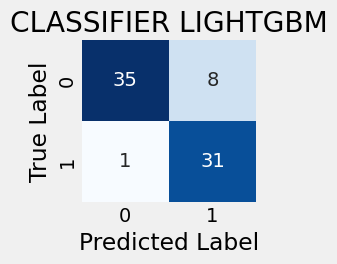

              precision    recall  f1-score   support

           0       0.97      0.81      0.89        43
           1       0.79      0.97      0.87        32

    accuracy                           0.88        75
   macro avg       0.88      0.89      0.88        75
weighted avg       0.90      0.88      0.88        75



In [64]:
from lightgbm import  LGBMClassifier
lgbmc = LGBMClassifier().fit(xTrain,yTrain)
predict = lgbmc.predict(xTest)

# print(accuracy_score(yTest,predict))
R2CV = cross_val_score(lgbmc,xTest,yTest,cv=10).mean()
# print(R2CV)
# 0.77
error = mean_squared_error(yTest,predict)
# print(np.sqrt(error))

params = {"n_estimators": [100, 500, 1000, 2000],
          "subsample": [0.6, 0.8, 1.0],
          "max-depth": [3, 4, 5, 6],
          "learning_rate": [0.1, 0.01, 0.02, 0.05],
          "min_child_samples": [5, 10, 20]}

# cv = GridSearchCV(lgbmc,params,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
# print(cv.best_params_)

lgbmctuned = LGBMClassifier(learning_rate=0.01, max_depth=3, min_child_samples=20,
                           n_estimators=500, subsample=0.5).fit(xTrain, yTrain)

predicttuned = lgbmctuned.predict(xTest)
# print(accuracy_score(yTest,predicttuned))
R2CVtuned = cross_val_score(lgbmctuned,xTest,yTest,cv=10).mean()
# print(R2CVtuned)
# 0.81
errortuned = mean_squared_error(yTest,predicttuned)
# print(np.sqrt(errortuned))
lgbm_acc = accuracy_score(yTest, lgbmctuned.predict(xTest))

print(f"Training Accuracy of LGBM Classifier is {accuracy_score(yTrain, lgbmctuned.predict(xTrain))}")
print(f"Test Accuracy of LGBM Classifier is {lgbm_acc} \n")

# Generate data for the confusion matrix
cm = confusion_matrix(yTest, lgbmctuned.predict(xTest))

# Generate image for the confusion matrix
plt.figure(figsize=(2, 2))  
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("CLASSIFIER LIGHTGBM")
plt.show()
print(classification_report(yTest, lgbmctuned.predict(xTest)))


# SVM

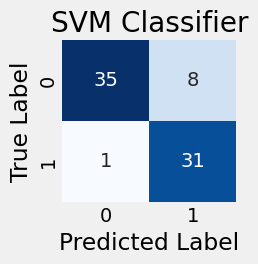

              precision    recall  f1-score   support

           0       0.97      0.81      0.89        43
           1       0.79      0.97      0.87        32

    accuracy                           0.88        75
   macro avg       0.88      0.89      0.88        75
weighted avg       0.90      0.88      0.88        75



In [66]:
from sklearn.svm import SVC
from sklearn.metrics import  mean_squared_error
from sklearn.metrics import confusion_matrix
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(xTrain, yTrain)
svm_predictions = svm_model.predict(xTest)


svm_accuracy = accuracy_score(yTest, svm_predictions)
svm_cv_score = cross_val_score(svm_model, xTest, yTest, cv=10).mean()
svm_error = mean_squared_error(yTest, svm_predictions)



cm = confusion_matrix(yTest, svm_predictions)

plt.figure(figsize=(2, 2))  
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("SVM Classifier")
plt.show()
from sklearn.metrics import classification_report
print(classification_report(yTest, svm_predictions))



# COMPARISON CLASSIFIERS

In [67]:
models = pd.DataFrame({
    'Model' : [ 'Logistic Regression Classifier','KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Gradient Boost Classifier',
               'XgBoost Classifier', 'Cat Boost Classifier', 'Lightgbm Classifier','SVM','CNN'],
    'Score' : [lgm_acc,knn_acc, dtc_acc, rfc_acc, gb_acc, xgb_acc, cat_acc,svm_accuracy, lgbm_acc,0.9642]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
9,CNN,0.964200
3,Random Forest Classifier,0.906667
4,Gradient Boost Classifier,0.893333
6,Cat Boost Classifier,0.893333
0,Logistic Regression Classifier,0.880000
5,XgBoost Classifier,0.880000
7,Lightgbm Classifier,0.880000
8,SVM,0.880000
2,Decision Tree Classifier,0.866667
1,KNN,0.680000


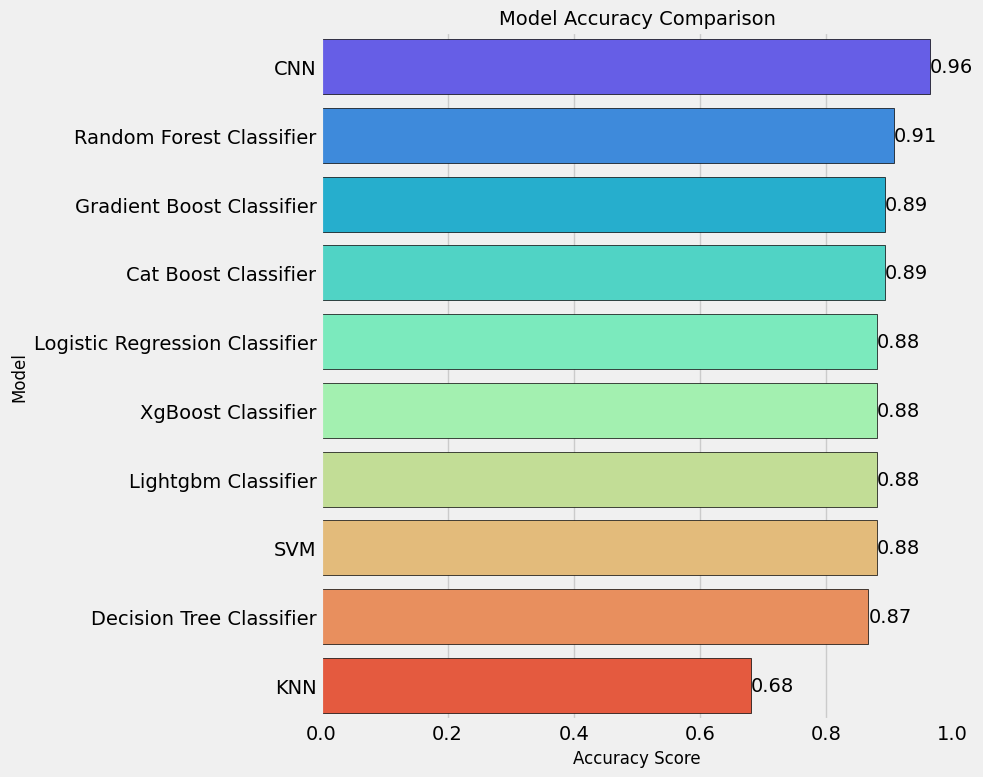

In [68]:
plt.figure(figsize=(10, 8))  # Increase the figure size for better readability
models_sorted= models.sort_values(by = 'Score', ascending = False)
sns.barplot(x='Score', y='Model', data=models_sorted ,palette='rainbow', edgecolor='black')  # Use a visually pleasing color palette and add edgecolor for definition

# Iterate over the bars and print the accuracy score on top
for index, value in enumerate(models_sorted['Score']):
    plt.text(value, index, f'{value:.2f}', va='center')  # Adjust text alignment if necessary

plt.xlabel('Accuracy Score', fontsize=12)  # Increase font size for x label
plt.ylabel('Model', fontsize=12)  # Increase font size for y label
plt.title('Model Accuracy Comparison', fontsize=14)  # Increase font size for title
plt.xlim(0, 1)  # Keep the x-axis limit to [0,1] for accuracy scores
plt.tight_layout()  # Adjust the layout to fit the figure nicely
plt.show()


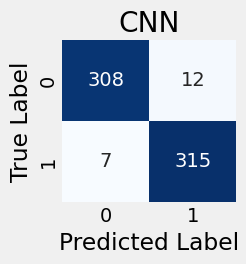

In [35]:
import numpy as np
confusion_matrix = np.array([[308, 12],[7,315]])
cm = confusion_matrix
plt.figure(figsize=(2, 2))  
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("CNN")
plt.show()
